In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

# API + Permission

In [86]:
data = pd.read_csv('Dataset/Malgenome/api+permcomb.csv')
data.head()

,READ_SMS,WRITE_SMS,READ_PHONE_STATE,GET_ACCOUNTS,SEND_SMS,WRITE_APN_SETTINGS,RECEIVE_SMS,USE_CREDENTIALS,MANAGE_ACCOUNTS,RESTART_PACKAGES,...,Process.start,IRemoteService,TelephonyManager.getCallState,Runtime.getRuntime,TelephonyManager.isNetworkRoaming,TelephonyManager.getSimOperator,sendMultipartTextMessage,Ljavax.crypto.Cipher,Ljava.lang.Object.getClass,class
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,1
1,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
2,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,1,1,1,0,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,1,1


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Columns: 182 entries, READ_SMS to class
dtypes: int64(182)
memory usage: 5.3 MB


In [88]:
data = data.dropna()

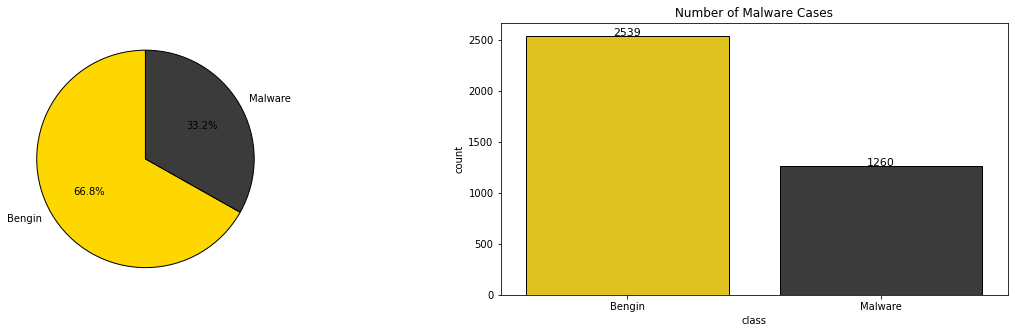

In [89]:
fraud = len(data[data['class'] == 1]) / len(data) * 100
nofraud = len(data[data['class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud,fraud]

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Bengin','Malware'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(x='class',data = data,edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Bengin','Malware'])
plt.title('Number of Malware Cases');

In [90]:
X = data.drop('class', axis=1)
y = data['class']

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()

rfe = RFE(model, step=2)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['READ_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS', 'SEND_SMS', 'WRITE_APN_SETTINGS', 'RECEIVE_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'CALL_PHONE', 'READ_SYNC_SETTINGS', 'INTERNET', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'WRITE_CONTACTS', 'SYSTEM_ALERT_WINDOW', 'NFC', 'READ_HISTORY_BOOKMARKS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'READ_CALENDAR', 'CHANGE_WIFI_STATE', 'READ_SYNC_STATS', 'WRITE_HISTORY_BOOKMARKS', 'DISABLE_KEYGUARD', 'MOUNT_UNMOUNT_FILESYSTEMS', 'WRITE_SECURE_SETTINGS', 'WRITE_SETTINGS', 'READ_CONTACTS', 'BATTERY_STATS', 'KILL_BACKGROUND_PROCESSES', 'CHANGE_NETWORK_STATE', 'REBOOT', 'WRITE_CALENDAR', 'PROCESS_OUTGOING_CALLS', 'BIND_DEVICE_ADMIN', 'ACCESS_MOCK_LOCATION', 'DELETE_PACKAGES', 'ACCESS_FINE_LOCATION', 'ACCESS_NETWORK_STATE', 'CLEAR_APP_USER_DATA', 'UPDATE_DEVICE_STATS', 'ACCESS_SURFACE_FLINGER', 'SET_PROCESS_LIMIT', 'VIBRATE', 'BROADCAST_SMS', 'DEVICE_POWER', 'SET_PREFERRED_APPLICATIONS', 'transact', 'android.os.Binder', 'attachInterface', 'Tele

In [92]:
X_new = data[['READ_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS', 'SEND_SMS', 'WRITE_APN_SETTINGS', 'RECEIVE_SMS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'CALL_PHONE', 'READ_SYNC_SETTINGS', 'INTERNET', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'WRITE_CONTACTS', 'SYSTEM_ALERT_WINDOW', 'NFC', 'READ_HISTORY_BOOKMARKS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'READ_CALENDAR', 'CHANGE_WIFI_STATE', 'READ_SYNC_STATS', 'WRITE_HISTORY_BOOKMARKS', 'DISABLE_KEYGUARD', 'MOUNT_UNMOUNT_FILESYSTEMS', 'WRITE_SECURE_SETTINGS', 'WRITE_SETTINGS', 'READ_CONTACTS', 'BATTERY_STATS', 'KILL_BACKGROUND_PROCESSES', 'CHANGE_NETWORK_STATE', 'REBOOT', 'WRITE_CALENDAR', 'PROCESS_OUTGOING_CALLS', 'BIND_DEVICE_ADMIN', 'ACCESS_MOCK_LOCATION', 'DELETE_PACKAGES', 'ACCESS_FINE_LOCATION', 'ACCESS_NETWORK_STATE', 'CLEAR_APP_USER_DATA', 'UPDATE_DEVICE_STATS', 'ACCESS_SURFACE_FLINGER', 'SET_PROCESS_LIMIT', 'VIBRATE', 'BROADCAST_SMS', 'DEVICE_POWER', 'SET_PREFERRED_APPLICATIONS', 'transact', 'android.os.Binder', 'attachInterface', 'TelephonyManager.getSubscriberId', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Ljava.lang.Class.getField', 'Landroid.content.Context.unregisterReceiver', 'Landroid.content.Context.registerReceiver', 'getBinder', 'createSubprocess', 'Ljava.net.URLDecoder', 'TelephonyManager.getDeviceId', 'Ljava.lang.Class.getDeclaredField', 'HttpGet.init', 'Ljava.lang.Class.getPackage', 'abortBroadcast', 'ClassLoader', 'TelephonyManager.getLine1Number', 'getCallingUid', 'android.telephony.gsm.SmsManager', 'Ljava.lang.Class.forName', 'TelephonyManager.getSimSerialNumber', 'android.intent.action.SEND', 'onBind', 'android.content.pm.Signature', 'PackageInstaller', 'android.telephony.SmsManager', 'Ljava.lang.Class.getResource', 'TelephonyManager.getSimCountryIso', 'Ljava.lang.Class.getClasses', 'Runtime.exec', 'Ljavax.crypto.spec.SecretKeySpec', 'Binder', 'Runtime.load', 'DexClassLoader', 'SecretKey', 'TelephonyManager.getCallState', 'Runtime.getRuntime', 'TelephonyManager.isNetworkRoaming', 'TelephonyManager.getSimOperator', 'sendMultipartTextMessage', 'Ljavax.crypto.Cipher', 'Ljava.lang.Object.getClass']]

In [93]:
rfe = rfe.fit(X_new, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X_new.columns[rfe.support_]))

Selected features: ['READ_SMS', 'SEND_SMS', 'WRITE_APN_SETTINGS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'READ_SYNC_SETTINGS', 'INTERNET', 'SYSTEM_ALERT_WINDOW', 'NFC', 'READ_HISTORY_BOOKMARKS', 'READ_CALENDAR', 'CHANGE_WIFI_STATE', 'WRITE_SECURE_SETTINGS', 'BATTERY_STATS', 'KILL_BACKGROUND_PROCESSES', 'CHANGE_NETWORK_STATE', 'REBOOT', 'WRITE_CALENDAR', 'ACCESS_NETWORK_STATE', 'CLEAR_APP_USER_DATA', 'VIBRATE', 'transact', 'attachInterface', 'TelephonyManager.getSubscriberId', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Landroid.content.Context.unregisterReceiver', 'Landroid.content.Context.registerReceiver', 'getBinder', 'createSubprocess', 'TelephonyManager.getDeviceId', 'Ljava.lang.Class.getPackage', 'abortBroadcast', 'ClassLoader', 'TelephonyManager.getLine1Number', 'getCallingUid', 'android.telephony.gsm.SmsManager', 'TelephonyManager.getSimSerialNumber', 'onBind', 'PackageInstaller', 'android.telephony.SmsManager', 'TelephonyManager.getSimCountryIso', 'Runt

In [94]:
X1 = data[['READ_SMS', 'SEND_SMS', 'WRITE_APN_SETTINGS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'READ_SYNC_SETTINGS', 'INTERNET', 'SYSTEM_ALERT_WINDOW', 'NFC', 'READ_HISTORY_BOOKMARKS', 'READ_CALENDAR', 'CHANGE_WIFI_STATE', 'WRITE_SECURE_SETTINGS', 'BATTERY_STATS', 'KILL_BACKGROUND_PROCESSES', 'CHANGE_NETWORK_STATE', 'REBOOT', 'WRITE_CALENDAR', 'ACCESS_NETWORK_STATE', 'CLEAR_APP_USER_DATA', 'VIBRATE', 'transact', 'attachInterface', 'TelephonyManager.getSubscriberId', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Landroid.content.Context.unregisterReceiver', 'Landroid.content.Context.registerReceiver', 'getBinder', 'createSubprocess', 'TelephonyManager.getDeviceId', 'Ljava.lang.Class.getPackage', 'abortBroadcast', 'ClassLoader', 'TelephonyManager.getLine1Number', 'getCallingUid', 'android.telephony.gsm.SmsManager', 'TelephonyManager.getSimSerialNumber', 'onBind', 'PackageInstaller', 'android.telephony.SmsManager', 'TelephonyManager.getSimCountryIso', 'Runtime.exec', 'TelephonyManager.getCallState', 'TelephonyManager.getSimOperator']]
rfe = rfe.fit(X1, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X1.columns[rfe.support_]))

Selected features: ['READ_SMS', 'SEND_SMS', 'USE_CREDENTIALS', 'READ_SYNC_SETTINGS', 'READ_CALENDAR', 'WRITE_SECURE_SETTINGS', 'BATTERY_STATS', 'KILL_BACKGROUND_PROCESSES', 'CHANGE_NETWORK_STATE', 'transact', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Landroid.content.Context.registerReceiver', 'getBinder', 'createSubprocess', 'TelephonyManager.getDeviceId', 'ClassLoader', 'android.telephony.gsm.SmsManager', 'onBind', 'PackageInstaller', 'android.telephony.SmsManager', 'Runtime.exec']


In [95]:
X_final = data[['READ_SMS', 'SEND_SMS', 'USE_CREDENTIALS', 'READ_SYNC_SETTINGS', 'READ_CALENDAR', 'WRITE_SECURE_SETTINGS', 'BATTERY_STATS', 'KILL_BACKGROUND_PROCESSES', 'CHANGE_NETWORK_STATE', 'transact', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Landroid.content.Context.registerReceiver', 'getBinder', 'createSubprocess', 'TelephonyManager.getDeviceId', 'ClassLoader', 'android.telephony.gsm.SmsManager', 'onBind', 'PackageInstaller', 'android.telephony.SmsManager', 'Runtime.exec']]

In [96]:
X_final

,READ_SMS,SEND_SMS,USE_CREDENTIALS,READ_SYNC_SETTINGS,READ_CALENDAR,WRITE_SECURE_SETTINGS,BATTERY_STATS,KILL_BACKGROUND_PROCESSES,CHANGE_NETWORK_STATE,transact,...,Landroid.content.Context.registerReceiver,getBinder,createSubprocess,TelephonyManager.getDeviceId,ClassLoader,android.telephony.gsm.SmsManager,onBind,PackageInstaller,android.telephony.SmsManager,Runtime.exec
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,0,0,0
4,1,1,0,0,0,0,0,0,1,1,...,1,0,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0
3795,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0,0
3796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3797,0,1,1,1,0,0,0,0,0,1,...,1,1,0,1,1,0,1,0,1,1


In [97]:
df = pd.DataFrame(data, columns=['READ_SMS', 'SEND_SMS', 'USE_CREDENTIALS', 'READ_SYNC_SETTINGS', 'READ_CALENDAR', 'WRITE_SECURE_SETTINGS', 'BATTERY_STATS', 'KILL_BACKGROUND_PROCESSES', 'CHANGE_NETWORK_STATE', 'transact', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Landroid.content.Context.registerReceiver', 'getBinder', 'createSubprocess', 'TelephonyManager.getDeviceId', 'ClassLoader', 'android.telephony.gsm.SmsManager', 'onBind', 'PackageInstaller', 'android.telephony.SmsManager', 'Runtime.exec','class'])

In [98]:
df.to_csv('malgenome.csv')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2) # keeping 15% for test 

In [17]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)
y_pred = log.predict(X_test)

lr_acc_a = accuracy_score(y_test,y_pred)
lr_prec_a = precision_score(y_test,y_pred)
lr_rec_a = recall_score(y_test,y_pred)
lr_f1_a = f1_score(y_test,y_pred)

In [20]:
storeResults('API+Permission : LR',lr_acc_a,lr_prec_a,lr_rec_a,lr_f1_a)

# SVM

In [21]:
# Support Vector Classifier model 
from sklearn.svm import SVC
svc = SVC()

# fit the model 
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

svc_acc_a = accuracy_score(y_test,y_pred)
svc_prec_a = precision_score(y_test,y_pred)
svc_rec_a = recall_score(y_test,y_pred)
svc_f1_a = f1_score(y_test,y_pred)

In [22]:
storeResults('API+Permission : SVC',svc_acc_a,svc_prec_a,svc_rec_a,svc_f1_a)

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

# fit the model 
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)

knn_acc_a = accuracy_score(y_test,y_pred)
knn_prec_a = precision_score(y_test,y_pred)
knn_rec_a = recall_score(y_test,y_pred)
knn_f1_a = f1_score(y_test,y_pred)

In [24]:
storeResults('API+Permission : KNN',knn_acc_a,knn_prec_a,knn_rec_a,knn_f1_a)

# Random Forest

In [25]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)

rf_acc_a = accuracy_score(y_test,y_pred)
rf_prec_a = precision_score(y_test,y_pred)
rf_rec_a = recall_score(y_test,y_pred)
rf_f1_a = f1_score(y_test,y_pred)

In [26]:
storeResults('API+Permission : RF',rf_acc_a,rf_prec_a,rf_rec_a,rf_f1_a)

# Decision Tree

In [27]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

dt_acc_a = accuracy_score(y_test,y_pred)
dt_prec_a = precision_score(y_test,y_pred)
dt_rec_a = recall_score(y_test,y_pred)
dt_f1_a = f1_score(y_test,y_pred)

In [28]:
storeResults('API+Permission : DT',dt_acc_a,dt_prec_a,dt_rec_a,dt_f1_a)

# Stacking CLassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10000)),('mlp', MLPClassifier(random_state=1, max_iter=900))]

clf = StackingClassifier(estimators=estimators, final_estimator=SVC())

# fit the model 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

stac_acc_a = accuracy_score(y_test,y_pred)
stac_prec_a = precision_score(y_test,y_pred)
stac_rec_a = recall_score(y_test,y_pred)
stac_f1_a = f1_score(y_test,y_pred)

storeResults('API+Permission : Stacking Classifier',stac_acc_a,stac_prec_a,stac_rec_a,stac_f1_a)

# Only API

In [32]:
data = pd.read_csv('Dataset/Malgenome/onlyapimalginome.csv')
data.head()

,transact,bindService,onServiceConnected,ServiceConnection,android.os.Binder,attachInterface,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.getField,...,Process.start,IRemoteService,TelephonyManager.getCallState,Runtime.getRuntime,TelephonyManager.isNetworkRoaming,TelephonyManager.getSimOperator,sendMultipartTextMessage,Ljavax.crypto.Cipher,Ljava.lang.Object.getClass,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,1,1,1,1,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,1,1


In [33]:
data = data.dropna()

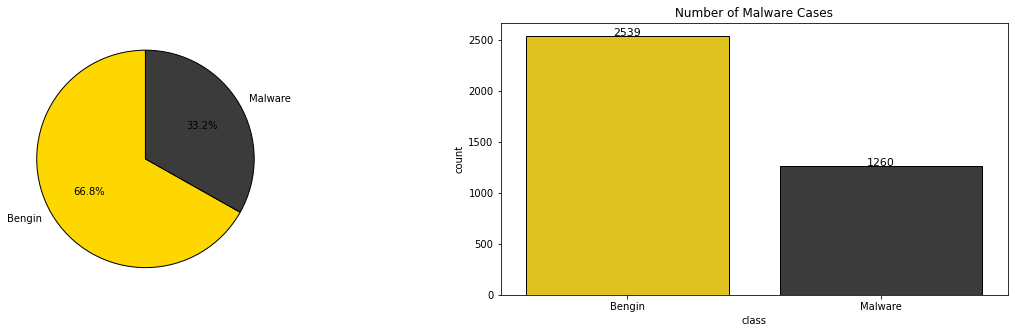

In [34]:
fraud = len(data[data['class'] == 1]) / len(data) * 100
nofraud = len(data[data['class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud,fraud]

colors = ['#FFD700','#3B3B3C']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(fraud_percentage,labels = ['Bengin','Malware'],autopct='%1.1f%%',startangle = 90,colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})

plt.subplot(1,2,2)
ax = sns.countplot(x='class',data = data,edgecolor = 'black',palette = colors)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Bengin','Malware'])
plt.title('Number of Malware Cases');

In [35]:
X = data.drop('class', axis=1)
y = data['class']

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()

rfe = RFE(model, step=2)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['transact', 'android.os.Binder', 'TelephonyManager.getSubscriberId', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Ljava.lang.Class.getField', 'Landroid.content.Context.unregisterReceiver', 'Landroid.content.Context.registerReceiver', 'getBinder', 'createSubprocess', 'TelephonyManager.getDeviceId', 'HttpGet.init', 'Ljava.lang.Class.getPackage', 'abortBroadcast', 'ClassLoader', 'TelephonyManager.getLine1Number', 'getCallingUid', 'android.telephony.gsm.SmsManager', 'android.intent.action.SEND', 'onBind', 'PackageInstaller', 'HttpUriRequest', 'android.telephony.SmsManager', 'Ljava.lang.Class.getResource', 'URLClassLoader', 'Runtime.exec', 'Ljavax.crypto.spec.SecretKeySpec', 'Runtime.load', 'DexClassLoader', 'ProcessBuilder', 'SecretKey', 'TelephonyManager.getCallState', 'TelephonyManager.isNetworkRoaming', 'TelephonyManager.getSimOperator', 'sendMultipartTextMessage', 'Ljava.lang.Object.getClass']


In [37]:
X_1 = data[['transact', 'android.os.Binder', 'TelephonyManager.getSubscriberId', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Ljava.lang.Class.getField', 'Landroid.content.Context.unregisterReceiver', 'Landroid.content.Context.registerReceiver', 'getBinder', 'createSubprocess', 'TelephonyManager.getDeviceId', 'HttpGet.init', 'Ljava.lang.Class.getPackage', 'abortBroadcast', 'ClassLoader', 'TelephonyManager.getLine1Number', 'getCallingUid', 'android.telephony.gsm.SmsManager', 'android.intent.action.SEND', 'onBind', 'PackageInstaller', 'HttpUriRequest', 'android.telephony.SmsManager', 'Ljava.lang.Class.getResource', 'URLClassLoader', 'Runtime.exec', 'Ljavax.crypto.spec.SecretKeySpec', 'Runtime.load', 'DexClassLoader', 'ProcessBuilder', 'SecretKey', 'TelephonyManager.getCallState', 'TelephonyManager.isNetworkRoaming', 'TelephonyManager.getSimOperator', 'sendMultipartTextMessage', 'Ljava.lang.Object.getClass']]

In [38]:
rfe = rfe.fit(X_1, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X_1.columns[rfe.support_]))

Selected features: ['transact', 'TelephonyManager.getSubscriberId', 'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods', 'Landroid.content.Context.unregisterReceiver', 'getBinder', 'createSubprocess', 'TelephonyManager.getDeviceId', 'abortBroadcast', 'ClassLoader', 'android.telephony.gsm.SmsManager', 'android.intent.action.SEND', 'PackageInstaller', 'android.telephony.SmsManager', 'Runtime.exec', 'DexClassLoader', 'SecretKey', 'sendMultipartTextMessage']


In [39]:
X_1

,transact,android.os.Binder,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.getField,Landroid.content.Context.unregisterReceiver,Landroid.content.Context.registerReceiver,getBinder,createSubprocess,...,Ljavax.crypto.spec.SecretKeySpec,Runtime.load,DexClassLoader,ProcessBuilder,SecretKey,TelephonyManager.getCallState,TelephonyManager.isNetworkRoaming,TelephonyManager.getSimOperator,sendMultipartTextMessage,Ljava.lang.Object.getClass
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,1,1,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,1
3795,1,1,0,1,1,1,1,1,0,0,...,1,0,0,0,1,0,0,1,0,1
3796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3797,1,1,0,1,1,1,1,1,1,0,...,1,0,1,0,1,0,1,1,1,1


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2) # keeping 15% for test 

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log1 = LogisticRegression()

# fit the model 
log1.fit(X_train,y_train)
y_pred = log1.predict(X_test)

lr_acc_b = accuracy_score(y_test,y_pred)
lr_prec_b = precision_score(y_test,y_pred)
lr_rec_b = recall_score(y_test,y_pred)
lr_f1_b = f1_score(y_test,y_pred)

In [42]:
storeResults('API : LR',lr_acc_b,lr_prec_b,lr_rec_b,lr_f1_b)

# SVC

In [43]:
# Support Vector Classifier model 
from sklearn.svm import SVC
svc1 = SVC()

# fit the model 
svc1.fit(X_train,y_train)
y_pred = svc1.predict(X_test)

svc_acc_b = accuracy_score(y_test,y_pred)
svc_prec_b = precision_score(y_test,y_pred)
svc_rec_b = recall_score(y_test,y_pred)
svc_f1_b = f1_score(y_test,y_pred)

In [44]:
storeResults('API : SVC',svc_acc_b,svc_prec_b,svc_rec_b,svc_f1_b)

# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
neigh1 = KNeighborsClassifier(n_neighbors=3)

# fit the model 
neigh1.fit(X_train,y_train)
y_pred = neigh1.predict(X_test)

knn_acc_b = accuracy_score(y_test,y_pred)
knn_prec_b = precision_score(y_test,y_pred)
knn_rec_b = recall_score(y_test,y_pred)
knn_f1_b = f1_score(y_test,y_pred)

In [46]:
storeResults('API : KNN',knn_acc_b,knn_prec_b,knn_rec_b,knn_f1_b)

# Random FOrest

In [47]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest1 = RandomForestClassifier(n_estimators=10)

# fit the model 
forest1.fit(X_train,y_train)
y_pred = forest1.predict(X_test)

rf_acc_b = accuracy_score(y_test,y_pred)
rf_prec_b = precision_score(y_test,y_pred)
rf_rec_b = recall_score(y_test,y_pred)
rf_f1_b = f1_score(y_test,y_pred)

In [48]:
storeResults('API : RF',rf_acc_b,rf_prec_b,rf_rec_b,rf_f1_b)

# Decision Tree

In [49]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree1 = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree1.fit(X_train, y_train)

y_pred = tree1.predict(X_test)

dt_acc_b = accuracy_score(y_test,y_pred)
dt_prec_b = precision_score(y_test,y_pred)
dt_rec_b = recall_score(y_test,y_pred)
dt_f1_b = f1_score(y_test,y_pred)

In [50]:
storeResults('API : DT',dt_acc_b,dt_prec_b,dt_rec_b,dt_f1_b)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10)),('mlp', MLPClassifier(random_state=1, max_iter=300))]

clf1 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier())

# fit the model 
clf1.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

stac_acc_a = accuracy_score(y_test,y_pred)
stac_prec_a = precision_score(y_test,y_pred)
stac_rec_a = recall_score(y_test,y_pred)
stac_f1_a = f1_score(y_test,y_pred)

storeResults('API : Stacking Classifier',stac_acc_a,stac_prec_a,stac_rec_a,stac_f1_a)

# Only Permission

In [52]:
data = pd.read_csv('Dataset/Malgenome/onlypermissionsmalginome.csv')
data.head()

,READ_SMS,WRITE_SMS,READ_PHONE_STATE,GET_ACCOUNTS,SEND_SMS,WRITE_APN_SETTINGS,RECEIVE_SMS,USE_CREDENTIALS,MANAGE_ACCOUNTS,RESTART_PACKAGES,...,MODIFY_PHONE_STATE,READ_EXTERNAL_STORAGE,SET_ORIENTATION,DEVICE_POWER,EXPAND_STATUS_BAR,GET_TASKS,GLOBAL_SEARCH,GET_PACKAGE_SIZE,SET_PREFERRED_APPLICATIONS,classs
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,1,0,1,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [53]:
data = data.dropna()

In [54]:
X = data.drop('classs', axis=1)
y = data['classs']

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression()

rfe = RFE(model, step=2)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['READ_SMS', 'WRITE_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS', 'SEND_SMS', 'WRITE_APN_SETTINGS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'RESTART_PACKAGES', 'INSTALL_PACKAGES', 'CAMERA', 'AUTHENTICATE_ACCOUNTS', 'INTERNET', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'RECEIVE_BOOT_COMPLETED', 'BLUETOOTH', 'WAKE_LOCK', 'SYSTEM_ALERT_WINDOW', 'NFC', 'READ_HISTORY_BOOKMARKS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'READ_CALENDAR', 'CHANGE_WIFI_STATE', 'READ_SYNC_STATS', 'READ_LOGS', 'MODIFY_AUDIO_SETTINGS', 'BROADCAST_STICKY', 'WRITE_SECURE_SETTINGS', 'WRITE_SETTINGS', 'READ_CALL_LOG', 'BATTERY_STATS', 'KILL_BACKGROUND_PROCESSES', 'CHANGE_NETWORK_STATE', 'REBOOT', 'WRITE_CALENDAR', 'BIND_DEVICE_ADMIN', 'CHANGE_WIFI_MULTICAST_STATE', 'MASTER_CLEAR', 'WRITE_CALL_LOG', 'WRITE_PROFILE', 'BIND_INPUT_METHOD', 'REORDER_TASKS', 'CHANGE_COMPONENT_ENABLED_STATE', 'ACCESS_MOCK_LOCATION', 'ACCESS_NETWORK_STATE', 'CLEAR_APP_USER_DATA', 'UPDATE_DEVICE_STATS', 'BROADCAST_WAP_PUSH', 'VIBRATE', 'CHANGE

In [56]:
X_1 = data[['READ_SMS', 'WRITE_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS', 'SEND_SMS', 'WRITE_APN_SETTINGS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'RESTART_PACKAGES', 'INSTALL_PACKAGES', 'CAMERA', 'AUTHENTICATE_ACCOUNTS', 'INTERNET', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'RECEIVE_BOOT_COMPLETED', 'BLUETOOTH', 'WAKE_LOCK', 'SYSTEM_ALERT_WINDOW', 'NFC', 'READ_HISTORY_BOOKMARKS', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'READ_CALENDAR', 'CHANGE_WIFI_STATE', 'READ_SYNC_STATS', 'READ_LOGS', 'MODIFY_AUDIO_SETTINGS', 'BROADCAST_STICKY', 'WRITE_SECURE_SETTINGS', 'WRITE_SETTINGS', 'READ_CALL_LOG', 'BATTERY_STATS', 'KILL_BACKGROUND_PROCESSES', 'CHANGE_NETWORK_STATE', 'REBOOT', 'WRITE_CALENDAR', 'BIND_DEVICE_ADMIN', 'CHANGE_WIFI_MULTICAST_STATE', 'MASTER_CLEAR', 'WRITE_CALL_LOG', 'WRITE_PROFILE', 'BIND_INPUT_METHOD', 'REORDER_TASKS', 'CHANGE_COMPONENT_ENABLED_STATE', 'ACCESS_MOCK_LOCATION', 'ACCESS_NETWORK_STATE', 'CLEAR_APP_USER_DATA', 'UPDATE_DEVICE_STATS', 'BROADCAST_WAP_PUSH', 'VIBRATE', 'CHANGE_CONFIGURATION', 'BROADCAST_SMS', 'SET_ORIENTATION', 'SET_PREFERRED_APPLICATIONS']]

In [57]:
rfe = rfe.fit(X_1, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X_1.columns[rfe.support_]))

Selected features: ['READ_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS', 'SEND_SMS', 'WRITE_APN_SETTINGS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'INSTALL_PACKAGES', 'CAMERA', 'INTERNET', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'BLUETOOTH', 'SYSTEM_ALERT_WINDOW', 'NFC', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'READ_CALENDAR', 'CHANGE_WIFI_STATE', 'READ_SYNC_STATS', 'MODIFY_AUDIO_SETTINGS', 'READ_CALL_LOG', 'CHANGE_NETWORK_STATE', 'REBOOT', 'WRITE_CALL_LOG', 'ACCESS_NETWORK_STATE', 'UPDATE_DEVICE_STATS', 'BROADCAST_WAP_PUSH']


In [58]:
X_final = data[['READ_SMS', 'READ_PHONE_STATE', 'GET_ACCOUNTS', 'SEND_SMS', 'WRITE_APN_SETTINGS', 'USE_CREDENTIALS', 'MANAGE_ACCOUNTS', 'INSTALL_PACKAGES', 'CAMERA', 'INTERNET', 'ACCESS_LOCATION_EXTRA_COMMANDS', 'BLUETOOTH', 'SYSTEM_ALERT_WINDOW', 'NFC', 'BIND_REMOTEVIEWS', 'READ_PROFILE', 'READ_CALENDAR', 'CHANGE_WIFI_STATE', 'READ_SYNC_STATS', 'MODIFY_AUDIO_SETTINGS', 'READ_CALL_LOG', 'CHANGE_NETWORK_STATE', 'REBOOT', 'WRITE_CALL_LOG', 'ACCESS_NETWORK_STATE', 'UPDATE_DEVICE_STATS', 'BROADCAST_WAP_PUSH']]

In [59]:
X_final

,READ_SMS,READ_PHONE_STATE,GET_ACCOUNTS,SEND_SMS,WRITE_APN_SETTINGS,USE_CREDENTIALS,MANAGE_ACCOUNTS,INSTALL_PACKAGES,CAMERA,INTERNET,...,CHANGE_WIFI_STATE,READ_SYNC_STATS,MODIFY_AUDIO_SETTINGS,READ_CALL_LOG,CHANGE_NETWORK_STATE,REBOOT,WRITE_CALL_LOG,ACCESS_NETWORK_STATE,UPDATE_DEVICE_STATS,BROADCAST_WAP_PUSH
0,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3795,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3796,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3797,0,1,1,1,0,1,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2) # keeping 15% for test 

# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log2 = LogisticRegression()

# fit the model 
log2.fit(X_train,y_train)
y_pred = log2.predict(X_test)

lr_acc_c = accuracy_score(y_test,y_pred)
lr_prec_c = precision_score(y_test,y_pred)
lr_rec_c = recall_score(y_test,y_pred)
lr_f1_c = f1_score(y_test,y_pred)

In [62]:
storeResults('Premission : LR',lr_acc_c,lr_prec_c,lr_rec_c,lr_f1_c)

# SVC

In [63]:
# Support Vector Classifier model 
from sklearn.svm import SVC
svc2 = SVC()

# fit the model 
svc2.fit(X_train,y_train)
y_pred = svc2.predict(X_test)

svc_acc_c = accuracy_score(y_test,y_pred)
svc_prec_c = precision_score(y_test,y_pred)
svc_rec_c = recall_score(y_test,y_pred)
svc_f1_c = f1_score(y_test,y_pred)

In [64]:
storeResults('Premission : SVC',svc_acc_c,svc_prec_c,svc_rec_c,svc_f1_c)

# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
neigh2 = KNeighborsClassifier(n_neighbors=3)

# fit the model 
neigh2.fit(X_train,y_train)
y_pred = neigh2.predict(X_test)

knn_acc_c = accuracy_score(y_test,y_pred)
knn_prec_c = precision_score(y_test,y_pred)
knn_rec_c = recall_score(y_test,y_pred)
knn_f1_c = f1_score(y_test,y_pred)

In [66]:
storeResults('Premission : KNN',knn_acc_c,knn_prec_c,knn_rec_c,knn_f1_c)

# Random FOrest

In [67]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest2 = RandomForestClassifier(n_estimators=10)

# fit the model 
forest2.fit(X_train,y_train)
y_pred = forest2.predict(X_test)

rf_acc_c = accuracy_score(y_test,y_pred)
rf_prec_c = precision_score(y_test,y_pred)
rf_rec_c = recall_score(y_test,y_pred)
rf_f1_c = f1_score(y_test,y_pred)

In [68]:
storeResults('Premission : RF',rf_acc_c,rf_prec_c,rf_rec_c,rf_f1_c)

# Decision Tree

In [69]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree2 = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree2.fit(X_train, y_train)

y_pred = tree2.predict(X_test)

dt_acc_c = accuracy_score(y_test,y_pred)
dt_prec_c = precision_score(y_test,y_pred)
dt_rec_c = recall_score(y_test,y_pred)
dt_f1_c = f1_score(y_test,y_pred)

In [70]:
storeResults('Premission : DT',dt_acc_c,dt_prec_c,dt_rec_c,dt_f1_c)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=10)),('mlp', MLPClassifier(random_state=1, max_iter=300))]

clf2 = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier())

# fit the model 
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)

stac_acc_a = accuracy_score(y_test,y_pred)
stac_prec_a = precision_score(y_test,y_pred)
stac_rec_a = recall_score(y_test,y_pred)
stac_f1_a = f1_score(y_test,y_pred)

storeResults('Premission : Stacking Classifier',stac_acc_a,stac_prec_a,stac_rec_a,stac_f1_a)

# Comparison

In [72]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision, 
                       'f1_score' : f1score,
                        'Recall'   : recall,
                        
                      })

In [73]:
result

,ML Model,Accuracy,Precision,f1_score,Recall
0,API+Permission : LR,0.98,0.97,0.97,0.96
1,API+Permission : SVC,0.98,0.97,0.97,0.97
2,API+Permission : KNN,0.97,0.97,0.95,0.94
3,API+Permission : RF,0.98,0.96,0.96,0.97
4,API+Permission : DT,0.97,0.94,0.95,0.96
5,API+Permission : Stacking Classifier,0.99,0.98,0.98,0.99
6,API : LR,0.98,0.97,0.98,0.98
7,API : SVC,0.99,0.98,0.98,0.98
8,API : KNN,0.98,0.97,0.97,0.97
9,API : RF,0.98,0.98,0.98,0.97


# Graph

In [74]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

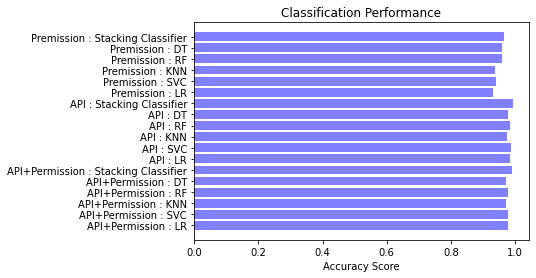

In [75]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

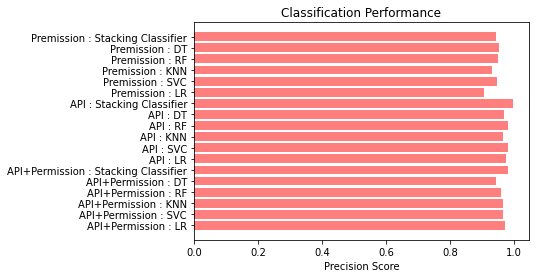

In [76]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

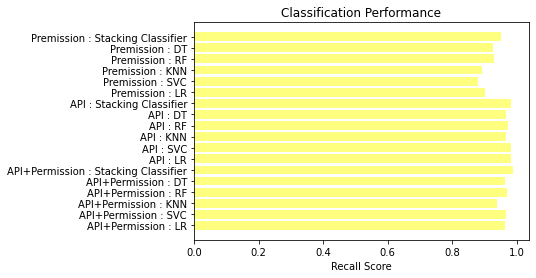

In [77]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

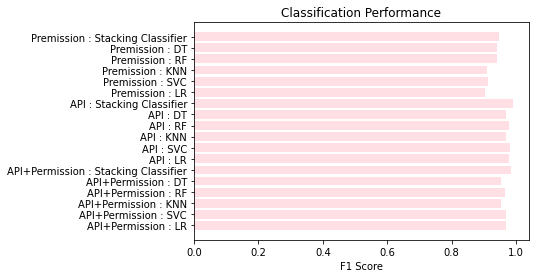

In [78]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='pink')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Modelling

In [80]:
import joblib
filename = 'model_mal.sav'
joblib.dump(clf, filename)

['model_mal.sav']